### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [13]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro,  poisson, chisquare, expon, kstest
from scipy import stats
from scipy.stats import mannwhitneyu

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('customertotal.csv')
df.head(1)

,Unnamed: 0,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,marital status,loyalty card,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,salary
0,0,480934,2017,1,0,0,0,0,0,0,0.0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard,2016,2,NaN,NaN,83236.0


1. Preparación de datos:

In [5]:
df_3 = df[['flights booked', 'education']]
df_3

,flights booked,education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor
...,...,...
403755,0,Bachelor
403756,0,Bachelor
403757,0,Bachelor
403758,0,Bachelor


In [6]:
# superior: 'Doctor', 'Master', 'Bachelor'
# inferior: 'College', 'High school or below'
df_3['education_nivel'] = np.where(df_3['education'].isin(['Doctor', 'Master', 'Bachelor']), 'superior', 'inferior')
df_3.sample(10)

,flights booked,education,education_nivel
146723,0,College,inferior
245010,4,High School or Below,inferior
293900,7,Bachelor,superior
192144,1,Bachelor,superior
237990,15,College,inferior
105734,0,Bachelor,superior
312118,0,Master,superior
362064,0,Doctor,superior
65305,0,Bachelor,superior
94088,0,College,inferior


2. Análisis Descriptivo:

In [7]:
df_3.groupby('education_nivel')['flights booked'].describe()

,count,mean,std,min,25%,50%,75%,max
education_nivel,,,,,,,,
inferior,121175.0,4.170753,5.244962,0.0,0.0,1.0,8.0,21.0
superior,282585.0,4.118311,5.223592,0.0,0.0,1.0,8.0,21.0


In [17]:
df_inferior = df_3[df_3['education_nivel'] == 'inferior']
df_superior = df_3[df_3['education_nivel'] == 'superior']

In [8]:
df_3.groupby('education')['flights booked'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


Las medias y la desviación son casi iguales, al iguales que los percentiles.

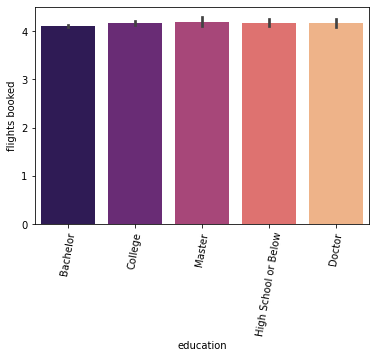

In [9]:
sns.barplot(x = "education", y = "flights booked", data = df_3, palette = "magma")
plt.xticks(rotation = 80);

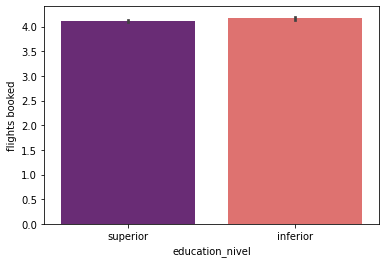

In [10]:
sns.barplot(x = "education_nivel", y = "flights booked", data = df_3, palette = "magma");

3. Prueba Estadística:

Hipótesis nula = No hay diferencia en el número de vuelos según el nivel educativo de los pasajeros.

Hipótesis alternativa = Si hay diferencia

COMPROBANDO LA NORMALIDAD Y CON MANWHITNEY

In [12]:
p_value = kstest(df_3['flights booked'], "norm").pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 0.0 )


Ya no haria falta calcular la homogeneidad, no sigue una distribución normal (gaussiana)

In [19]:
statistic, p_value = mannwhitneyu(df_inferior['flights booked'],df_superior ['flights booked'])
if p_value < 0.05: 
    print(f'El p_value es {p_value} es menor a 0.05. Hay diferencias significativas')
else: 
    print(f'El p_value es {p_value} es mayor a 0.05. No hay diferencias significativas')

El p_value es 0.002942081262120518 es menor a 0.05. Hay diferencias significativas


El nivel de estudios si afecta a la compra de billetes

UTILIZANDO LEVENE Y TSTUDENT

In [ ]:
# El t-test es una prueba estadística que se utiliza para comparar dos grupos y determinar si hay una diferencia significativa entre ellos en términos de una variable que estamos midiendo.
#La prueba de Levene se utiliza para verificar si las varianzas de dos o más grupos son iguales o diferentes. 
#La hipótesis nula (H0) es que las varianzas son iguales en todos los grupos, mientras que la hipótesis alternativa (H1) es que al menos una de las varianzas es diferente.
#Es necesaria para realizar el T-student

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    
    p_valor_varianza = stats.levene(*args, center = "median")[1]
   
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print("Rechazamos la hipótesis nula.")
        print("Hay una diferencia significativa entre los dos grupos.")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.")

In [ ]:
# filtramos los datos para obtener dos grupos: educación básica 4 años y educación secundaria
superior = df_3[df_3['education_nivel'] == 'superior']["flights booked"]
inferior = df_3[df_3['education_nivel'] == 'inferior']["flights booked"]

# llamamos a la función que hemos creado
prueba_hipotesis(superior, inferior )


Rechazamos la hipótesis nula.
Hay una diferencia significativa entre los dos grupos.


Por lo tanto, el nivel de estudios si afecta en la compra de billetes.